In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'c:\\Users\\dukuku1\\OneDrive - Louisiana State University\\Documents\\LSU\\Classes\\2nd year\\Spring\\Che 7700\\Project\\ezyzip (1)'

In [2]:
from model.lstm_model import LSTM_model
from src.data_preprocess import DataPreprocessing

In [3]:
preprocessor = DataPreprocessing()

data = preprocessor.load_data("data/Load_data_new.csv")
data.columns

Index(['air_pressure[mmHg]', 'air_temperature[degree celcius]',
       'relative_humidity[%]', 'wind_speed[M/S]', 'solar_irridiation[W/m²]',
       'total_cloud_cover[from ten]', 'electricity_demand_values[kw]',
       'heat_demand_values[kw]'],
      dtype='object')

In [4]:
file_path = "data/Load_data_new.csv"

lstm = LSTM_model(file_path)

# X_train_electricity, X_test_electricity, y_train_electricity, y_test_electricity, X_train_heat, X_test_heat, y_train_heat, y_test_heat= lstm.load_and_preprocess_data()
X_train_electricity, X_test_electricity, y_train_electricity, y_test_electricity, X_train_heat, X_test_heat, y_train_heat, y_test_heat = lstm.split_data()

# lstm.compile_model_electricity()

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import os
save_path = 'plots'  


In [6]:

y_train_pred_elec, y_test_pred_elec = lstm.predict_electricity(
    "X_train_electricity", "X_test_electricity",
    "y_train_electricity", "y_test_electricity"
)


c:\Users\dukuku1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 117404.0547 - val_loss: 57542.7617
Epoch 2/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - loss: 57517.3164 - val_loss: 47570.4805
Epoch 3/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 45511.2617 - val_loss: 45419.3516
Epoch 4/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 45274.2656 - val_loss: 44782.0938
Epoch 5/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 44447.5625 - val_loss: 44106.5273
Epoch 6/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 43605.2305 - val_loss: 43470.8906
Epoch 7/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 42714.5234 - val_loss: 42290.3945
Epoch 8/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 40748.4180 - val_loss: 40289.0078
Epoch 9/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 38136.9883 - val_loss: 38852.1211
Epoch 10/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 35954.1836 - val_loss: 37128.8125
Epoch 11/50
1752/1

In [7]:
r2_test_electricity, mse_test_electricity = lstm.evaluate(y_test_electricity, y_test_pred_elec)
r2_train_electricity, mse_train_electricity = lstm.evaluate(y_train_electricity, y_train_pred_elec)

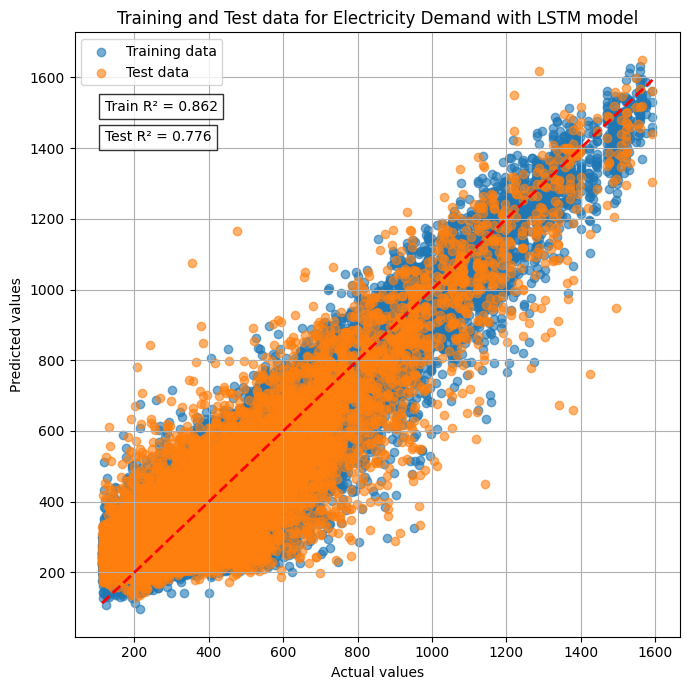

In [8]:
lstm.plot_electricity(y_train_pred_elec,y_train_electricity, y_test_pred_elec,y_test_electricity,r2_train_electricity,r2_test_electricity,save_path)

In [9]:
y_train_pred_heat, y_test_pred_heat = lstm.predict_heat(
    "X_train_heat", "X_test_heat",
    "y_train_heat", "y_test_heat"
)


c:\Users\dukuku1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - loss: 126038.3047 - val_loss: 99900.3984
Epoch 2/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 99214.5938 - val_loss: 99860.7422
Epoch 3/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 98574.3828 - val_loss: 121112.0547
Epoch 4/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 100795.0547 - val_loss: 97673.2109
Epoch 5/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 96572.6719 - val_loss: 97806.6641
Epoch 6/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 97467.7188 - val_loss: 96589.8672
Epoch 7/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 95288.1328 - val_loss: 96399.6172
Epoch 8/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 96888.9453 - val_loss: 96454.0000
Epoch 9/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 95334.9375 - val_loss: 95933.3125
Epoch 10/50
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 94383.1172 - val_loss: 96080.7344
Epoch 11/50
1752

In [10]:
r2_test_heat, mse_test_heat = lstm.evaluate(y_test_heat, y_test_pred_heat)
r2_train_heat, mse_train_heat = lstm.evaluate(y_train_heat, y_train_pred_heat)

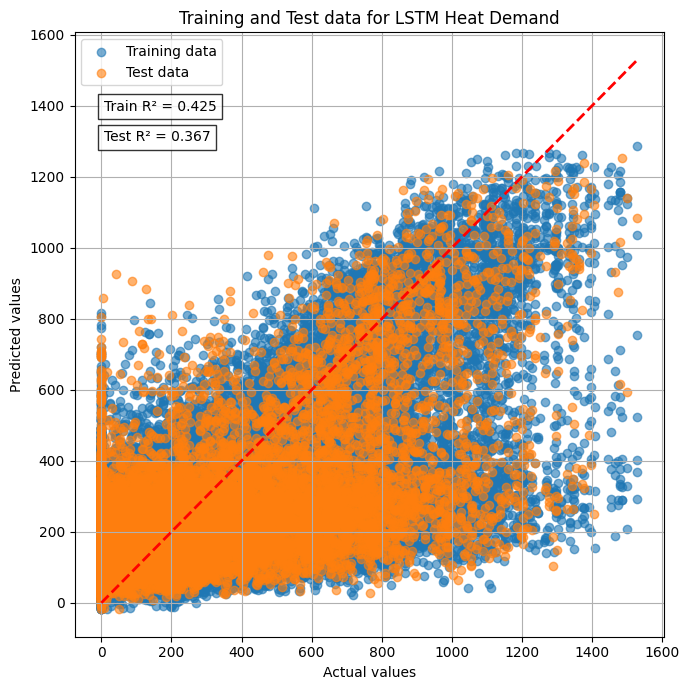

In [11]:
lstm.plot_heat(y_train_pred_heat,y_train_heat, y_test_pred_heat,y_test_heat,r2_train_heat,r2_test_heat,save_path)